# Murders

In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib import cm
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)    
import plotly.graph_objects as go

from IPython.display import HTML,display
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('E:\IIT_Guwhati\Semester_02\CS_595_Data_visualization_lab\Project\Crime'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



E:\IIT_Guwhati\Semester_02\CS_595_Data_visualization_lab\Project\Crime\Auto_theft.csv
E:\IIT_Guwhati\Semester_02\CS_595_Data_visualization_lab\Project\Crime\Complaints_against_police.csv
E:\IIT_Guwhati\Semester_02\CS_595_Data_visualization_lab\Project\Crime\Murders.csv
E:\IIT_Guwhati\Semester_02\CS_595_Data_visualization_lab\Project\Crime\Property_stolen_and_recovered.csv
E:\IIT_Guwhati\Semester_02\CS_595_Data_visualization_lab\Project\Crime\Rape_Victims.csv
E:\IIT_Guwhati\Semester_02\CS_595_Data_visualization_lab\Project\Crime\Murged_data\output1.csv
E:\IIT_Guwhati\Semester_02\CS_595_Data_visualization_lab\Project\Crime\Murged_data\output2.csv


# **Introduction**

Murder is the top most category of crime in India. Currently India's homicide rate is 3.08 per 100,000 population. The objective of this notebook is to see the trend of murder victims  over the years as well as murder victims per state. first lets see the data.

In [18]:
murder = pd.read_csv("E:\IIT_Guwhati\Semester_02\CS_595_Data_visualization_lab\Project\Crime\Murders.csv")
murder.Year.unique()
murder.Area_Name.unique()
murder.Sub_Group_Name.unique()
murder.head(10)


,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0
5,Chandigarh,2001,Murder - Female Victims,2. Female Victims,3.0,5,0.0,0.0,0.0,1.0,1.0
6,Chhattisgarh,2001,Murder - Female Victims,2. Female Victims,63.0,549,14.0,38.0,38.0,214.0,182.0
7,Delhi,2001,Murder - Female Victims,2. Female Victims,14.0,152,2.0,12.0,9.0,74.0,41.0
8,Goa,2001,Murder - Female Victims,2. Female Victims,1.0,13,NaN,NaN,NaN,4.0,8.0
9,Gujarat,2001,Murder - Female Victims,2. Female Victims,26.0,363,9.0,57.0,8.0,132.0,131.0


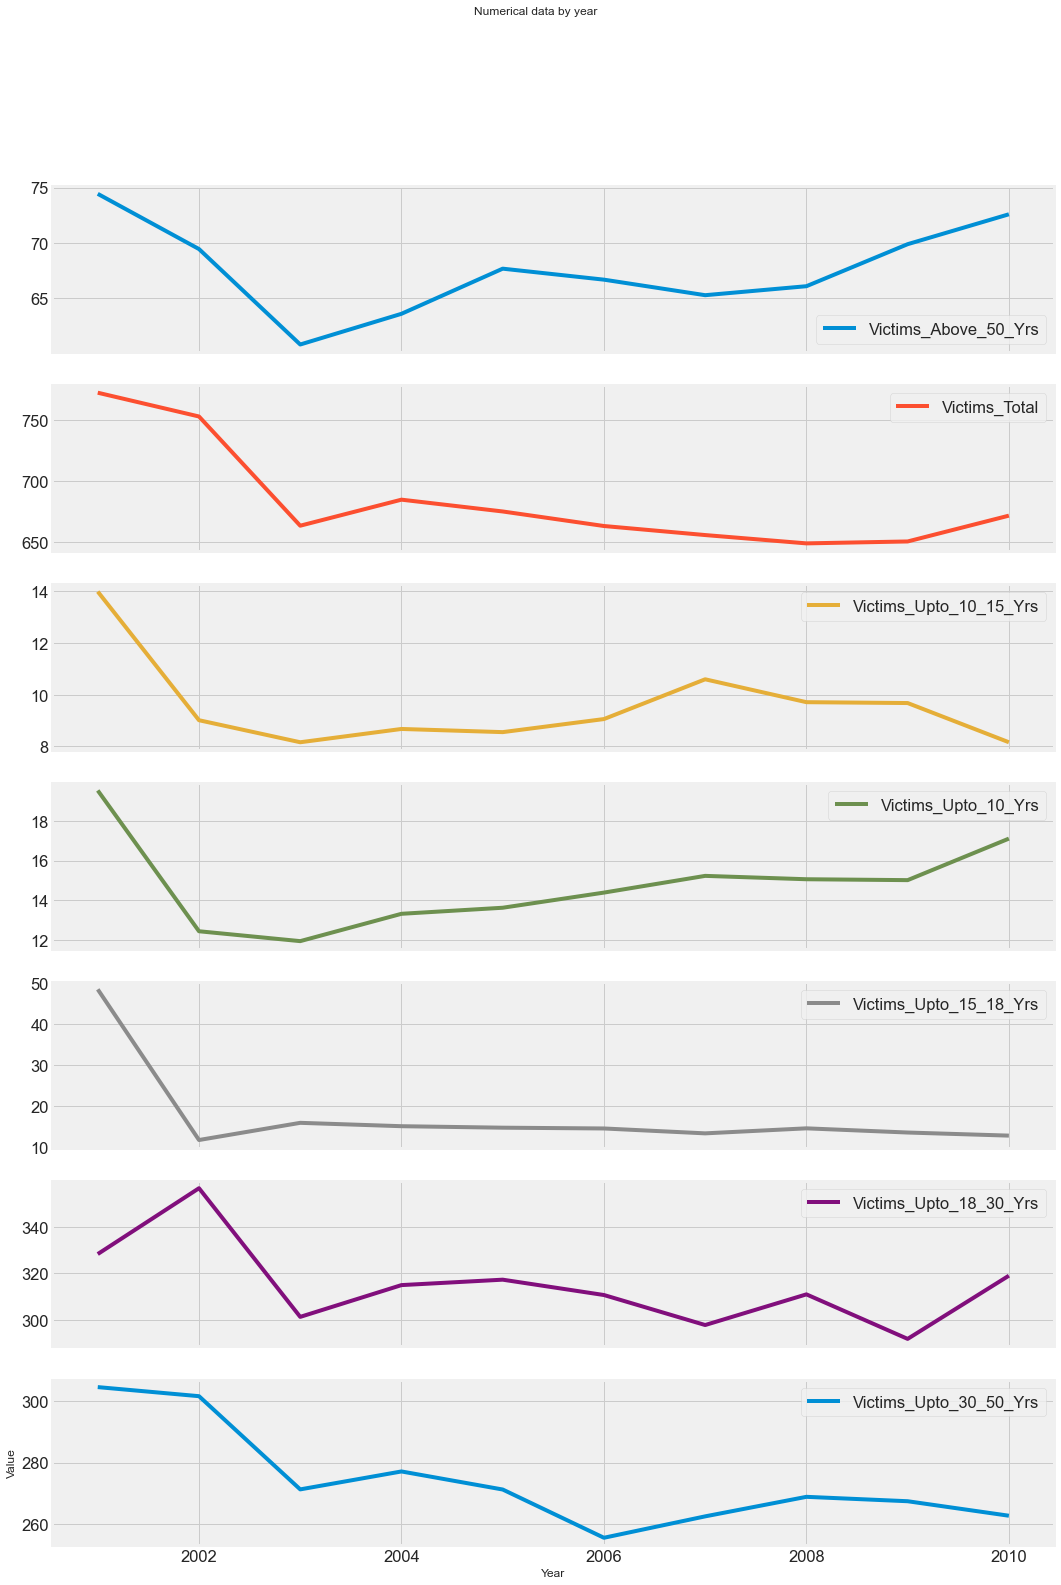

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
# Group the data by year and calculate the mean of each numerical column
grouped = murder.groupby('Year').mean()

# Plot each numerical column in the same plot
grouped.plot(kind='line', subplots=True, figsize=(16, 25))

# Set the plot title and labels
plt.suptitle('Numerical data by year')
plt.xlabel('Year')
plt.ylabel('Value')

# Show the plot
plt.show()

This dataset contains Victim's information from year 2001 to 2010 and 35 states & Union territories. The age group is divided into 6 categories.
* less than 10 year old victims
* 10-15 year old victims
* 15-18 year old victims
* 18-30 year old victims
* 30-50 year old victims
* 50 + older victims

In [20]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2693755" data-url="https://flo.uri.sh/visualisation/2693755/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

# Murder Victims Per Year

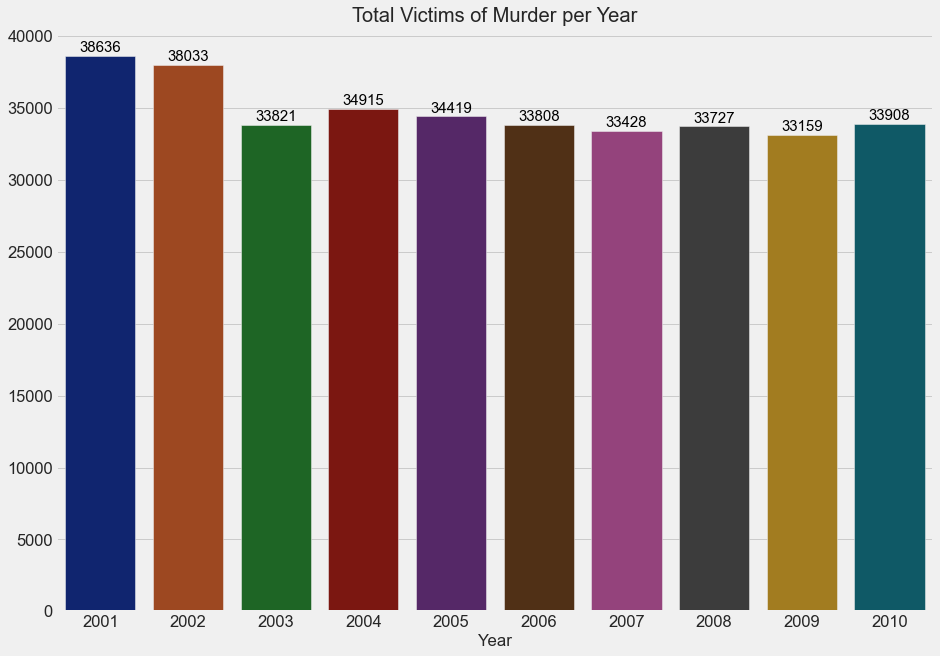

In [21]:


murdert = murder[murder['Sub_Group_Name']== '3. Total']  #keeping only total category of subgroup
murdery = murdert.groupby(['Year'])['Victims_Total'].sum().reset_index() #grouping
sns.set_context("talk")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
#sns.palplot(sns.color_palette("hls", 8))
ax = sns.barplot(x = 'Year' , y = 'Victims_Total' , data = murdery ,palette= 'dark') #plotting bar graph
plt.title("Total Victims of Murder per Year")
ax.set_ylabel('')
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')

**Inference** : We can see that the no. of victims is gradually decresing over the years.

Gender of the victims

Text(0, 0.5, '')

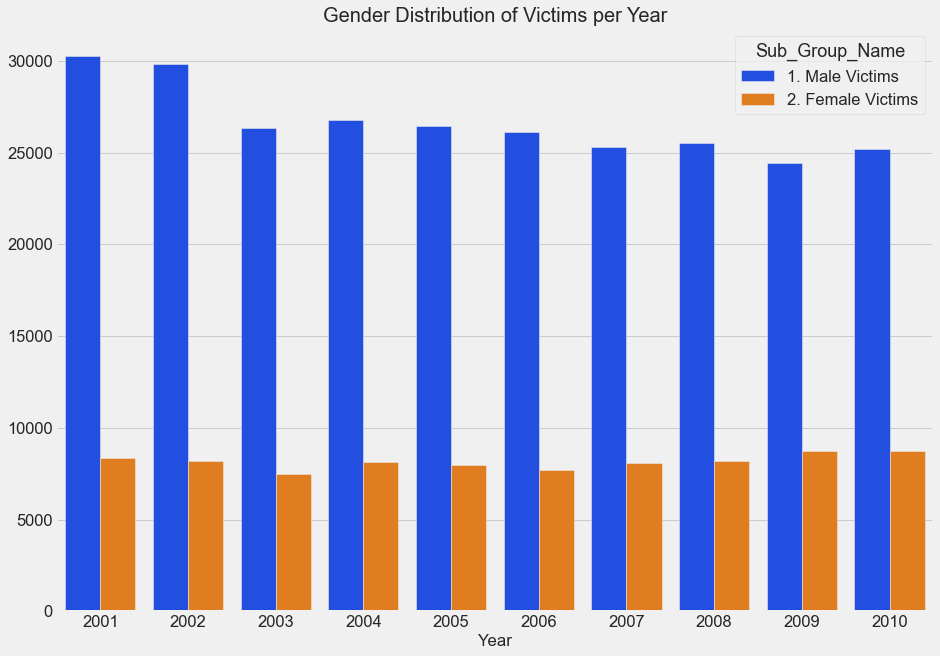

In [22]:
murderg = murder.groupby(['Year' , 'Sub_Group_Name'])['Victims_Total'].sum().reset_index() # grouping with year and sub group
murderg = murderg[murderg['Sub_Group_Name']!= '3. Total']   # we dont need total category of sub group

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
ax = sns.barplot( x = 'Year', y = 'Victims_Total' , hue = 'Sub_Group_Name' , data = murderg ,palette= 'bright') #plotting barplot
plt.title('Gender Distribution of Victims per Year',size = 20)
ax.set_ylabel('')

Inference: Males are more prone to be murder victim as compared to women . Over the years the number of male victims has decreased but the number of female victims is almost same as the previous years.

**Age of the victim**

Text(0, 0.5, '')

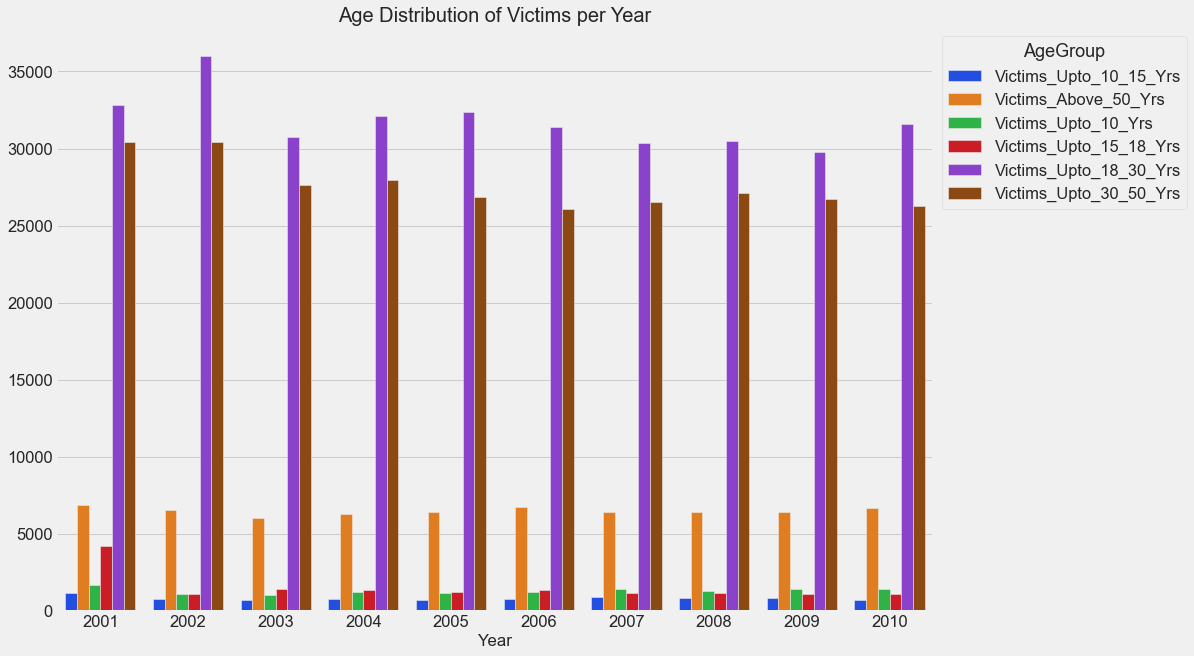

In [23]:
murdera = murder.groupby(['Year'])['Victims_Upto_10_15_Yrs','Victims_Above_50_Yrs',
                                   'Victims_Upto_10_Yrs', 'Victims_Upto_15_18_Yrs',
                                   'Victims_Upto_18_30_Yrs','Victims_Upto_30_50_Yrs',].sum().reset_index()  #grouby year and age group
murdera = murdera.melt('Year', var_name='AgeGroup',  value_name='vals') #melting the dataset

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Year' , y = 'vals',hue = 'AgeGroup' ,data = murdera ,palette= 'bright') #plotting a bar
plt.title('Age Distribution of Victims per Year',size = 20)
ax.get_legend().set_bbox_to_anchor((1, 1)) #anchoring the labels so that they dont show up on the graph
ax.set_ylabel('')


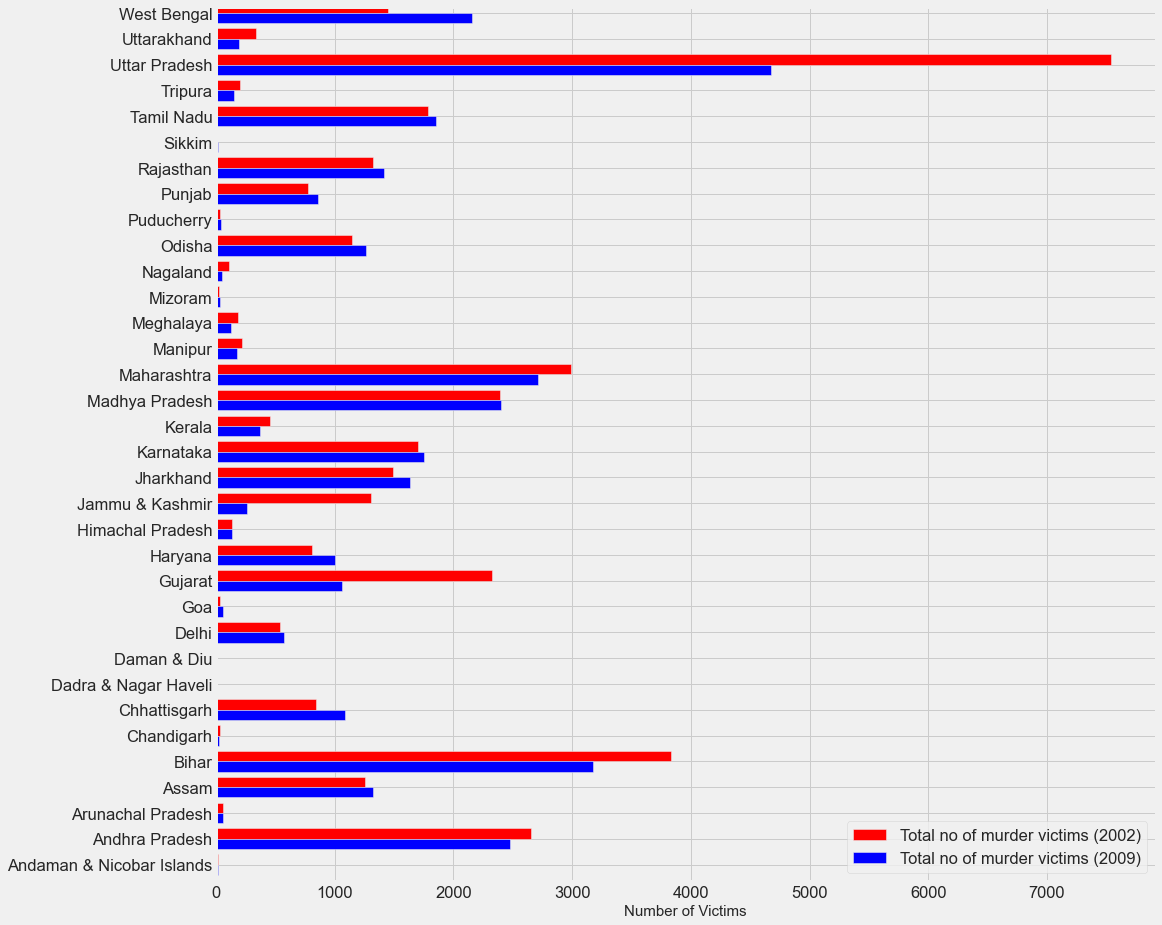

In [24]:
vic_murd_2002_total = murder[(murder['Year']==2002) & (murder['Sub_Group_Name']== '3. Total')]
vic_murd_2009_total = murder[(murder['Year']==2009) & (murder['Sub_Group_Name']== '3. Total')]
df1 = vic_murd_2002_total[['Area_Name','Victims_Total']]
df2 = vic_murd_2009_total[['Area_Name','Victims_Total']]
df1 ['Total no of murder victims (2002)'] = df1 ['Victims_Total']
df2 ['Total no of murder victims (2009)'] = df2 ['Victims_Total']
df1.drop(['Victims_Total'], axis = 1, inplace = True)
df2.drop(['Victims_Total'], axis = 1, inplace = True)
fig = plt.figure()
ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.4

df1.plot(kind='barh', color='red', ax=ax, width=width, position=0,figsize=(15,15))
df2.plot(kind='barh', color='blue', ax=ax, width=width, position=1,figsize=(15,15))
ax.set_xlabel("Number of Victims", fontsize=15)
ax.set_yticklabels(df1['Area_Name'])

plt.show()

**Inference**: Compared to people of other ages the age group 18 - 30 years is more prone to be victim of the murder. The rise in 2002 numbers is **maybe** due to the riots of gujrat . Another age group which is most likely to be victim of murder is 30 - 50. Compared to these two groups other age groups are very small in number. From all the groups children are most likely to be safe.

# Age & Gender of the victim

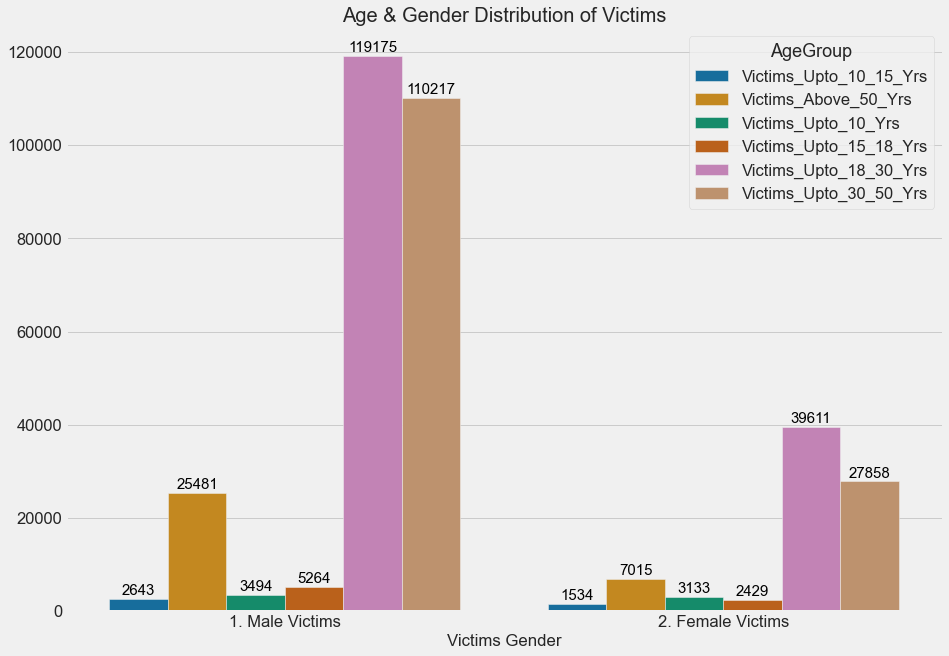

In [25]:
murderag = murder.groupby(['Sub_Group_Name'])['Victims_Upto_10_15_Yrs',
                                              'Victims_Above_50_Yrs', 'Victims_Upto_10_Yrs',
                                              'Victims_Upto_15_18_Yrs','Victims_Upto_18_30_Yrs',
                                              'Victims_Upto_30_50_Yrs',].sum().reset_index()       #grouping with the gender and age groups

murderag = murderag.melt('Sub_Group_Name', var_name='AgeGroup',  value_name='vals')  #melting the dataset for drawing the desired plot
murderag= murderag[murderag['Sub_Group_Name']!= '3. Total']

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
ax = sns.barplot(x = 'Sub_Group_Name' , y = 'vals',hue = 'AgeGroup' ,data = murderag,palette= 'colorblind') #making barplot taking Agegroup as hue/category 
plt.title('Age & Gender Distribution of Victims',size = 20)
ax.get_legend().set_bbox_to_anchor((1, 1)) #using anchor so that legend doesnt show on the graph
ax.set_ylabel('')
ax.set_xlabel('Victims Gender')
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')

Inference: Males of age 18-30 are more likely to be get killed as compared to the any of the age-gender group. After them male of 30-50 are prone to be victim of murder. Similar to male age groups females of age 18-30 are more likely to be get killed . 

# Murders: Statewise

In [26]:
murderst = murder[murder['Sub_Group_Name']== '3. Total']   #we need only total number of victims per state
murderst= murderst.groupby(['Area_Name'])['Victims_Total'].sum().sort_values(ascending = False).reset_index()
new_row = {'Area_Name':'Telangana', 'Victims_Total':27481}
murderst = murderst.append(new_row , ignore_index=True )
murderst.sort_values('Area_Name')
import geopandas as gpd
gdf = gpd.read_file('E:\IIT_Guwhati\Semester_02\CS_595_Data_visualization_lab\Project\Indian map\India States\Indian_States.shp')
murderst.at[17, 'Area_Name'] = 'NCT of Delhi'
merged = gdf.merge(murderst, left_on='st_nm', right_on='Area_Name')
merged.drop(['Area_Name'], axis=1)
#merged.describe()


,st_nm,geometry,Victims_Total
0,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",12761
1,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",34675
2,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",202
3,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",10787
4,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",53
5,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",412
6,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...",12757
7,Haryana,"POLYGON ((76.85065 30.87512, 76.86594 30.86691...",8793
8,Himachal Pradesh,"POLYGON ((76.79634 33.25490, 76.80351 33.25275...",1269
9,Jammu & Kashmir,"POLYGON ((74.73451 37.02068, 74.73647 37.01937...",7339


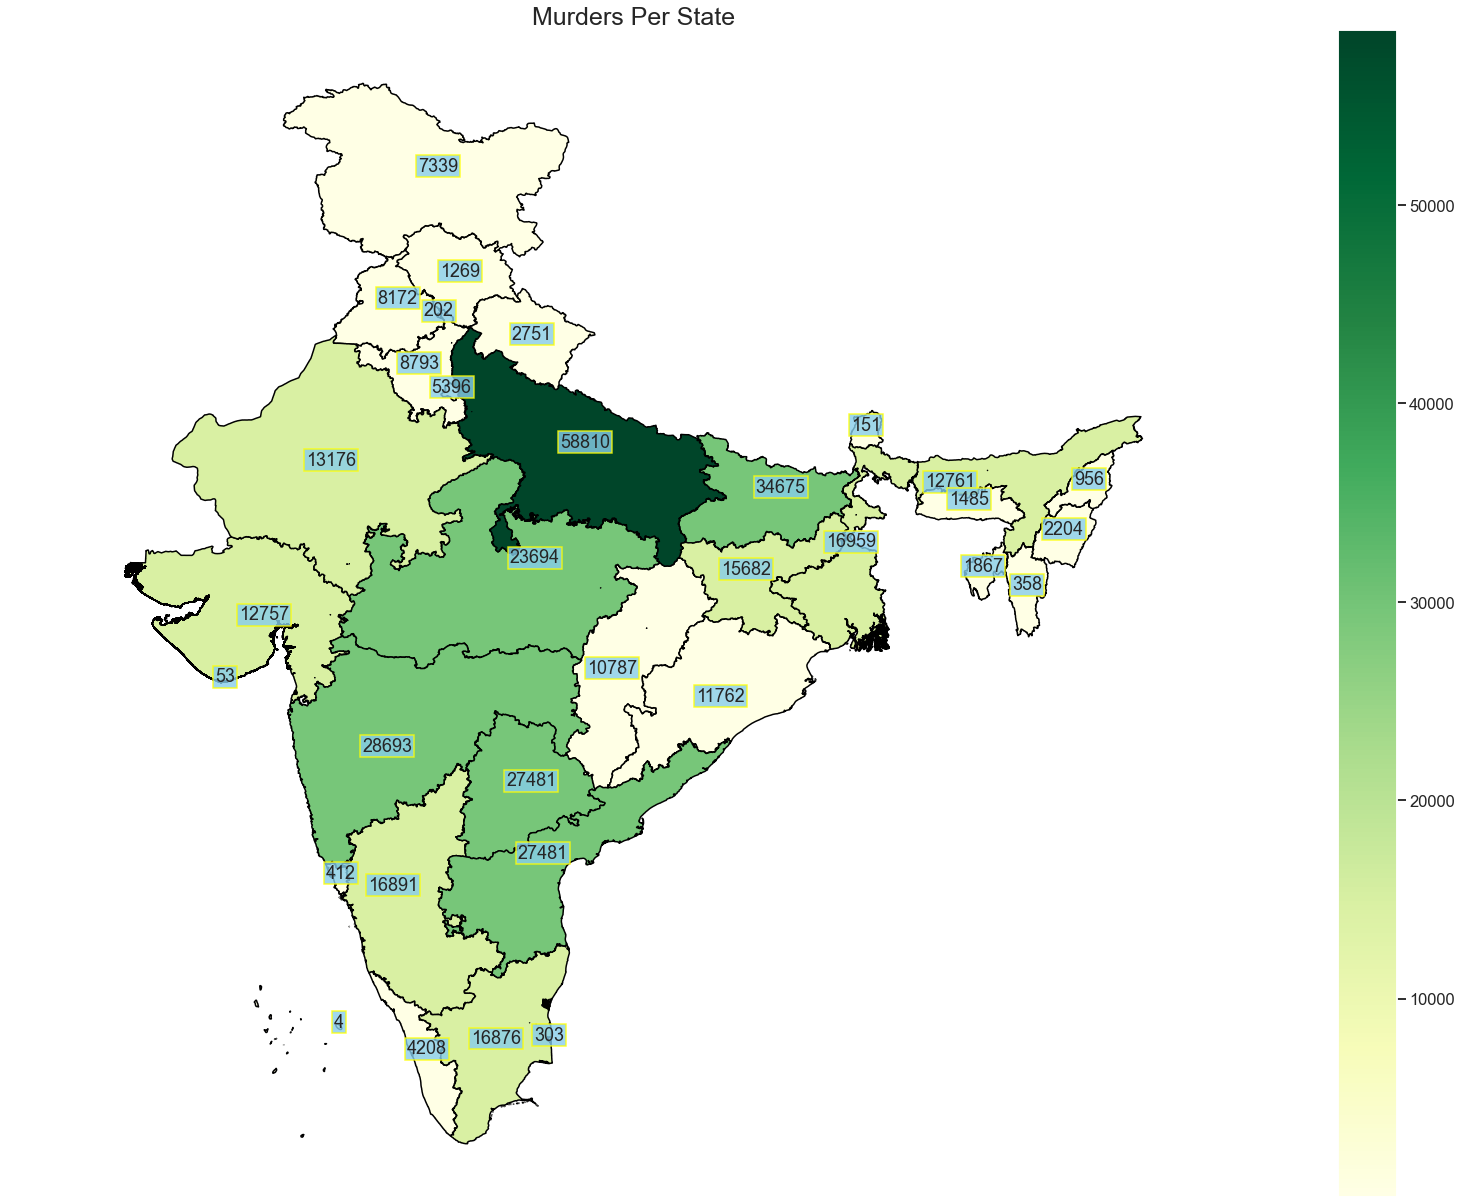

In [27]:

merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]


sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('dark_background')
cmap = 'YlGn'
figsize = (25, 20)

ax = merged.dropna().plot(column= 'Victims_Total', cmap=cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')


for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Victims_Total'], horizontalalignment='center', bbox={'facecolor': 'skyblue', 'alpha':0.8, 'pad': 2, 'edgecolor':'yellow'})


ax.set_title("Murders Per State", size = 25)

norm = matplotlib.colors.Normalize(vmin=merged['Victims_Total'].min(), vmax= merged['Victims_Total'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [28]:
# pip install mapclassify

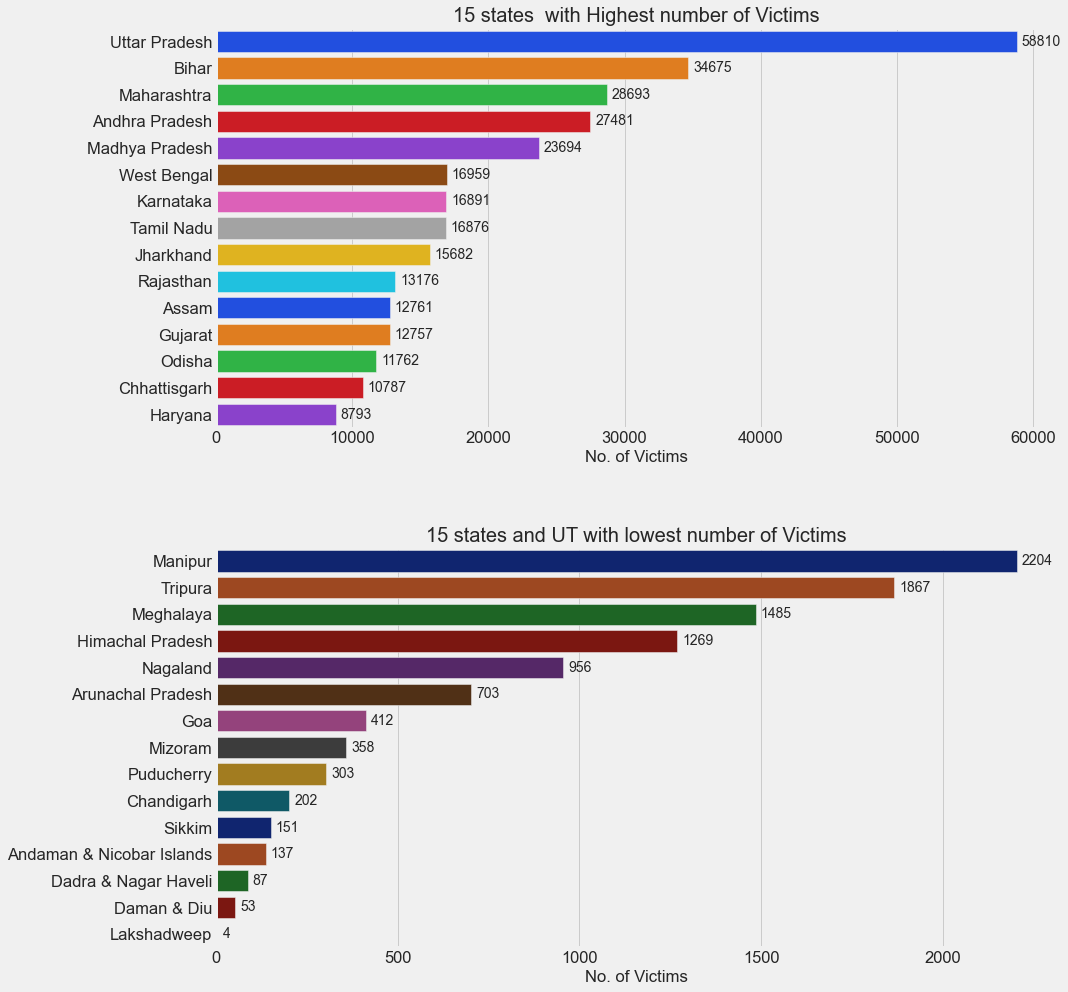

In [29]:
murders = murder[murder['Sub_Group_Name']== '3. Total']   #we need only total number of victims per state
murders= murders.groupby(['Area_Name'])['Victims_Total'].sum().sort_values(ascending = False).reset_index()
 
murdersbad = murders.head(15) #top highest states
murdersgood = murders.tail(15) #top lowest states/ut

#sns.set_context("talk")
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

f , axes = plt.subplots(2,1, figsize = (15,14))
ax = sns.barplot(x = 'Victims_Total' , y = 'Area_Name' , data = murdersbad, ax = axes[0],palette= 'bright') #barplot for highest numbers of victims per state
axes[0].set_title("15 states  with Highest number of Victims", size = 20)
axes[0].set_ylabel('')
axes[0].set_xlabel('No. of Victims')
ax1 = sns.barplot(x = 'Victims_Total' , y = 'Area_Name' , data = murdersgood, ax = axes[1],palette= 'dark' )#barplot for lowest numbers of victims per state
axes[1].set_title("15 states and UT with lowest number of Victims", size = 20)
axes[1].set_ylabel('')
axes[1].set_xlabel('No. of Victims')
plt.tight_layout()  #tight layout so that subplots look fitted
plt.subplots_adjust(hspace= .3) #adjusting the space between the plots
#murders.to_csv('murder.csv',index=False)
for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

for p in ax1.patches:
        ax1.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")


**Inference**: With almost 60000  murders Uttarpradesh has highest victims of murder. Bihar has second highest number of victims which has less than 25000 victims than Uttarpradesh. Interestingly Uttarpradesh  has the highest population in the country. Bihar has less population than maharashtra still it has higher number of victims than Maharashtra.

Union Territory Lakshadweep has lowest number of Murder Victims. Factors like population of the state and **Population density** might be responsible for the number of murder victims in the state.

Gender Distribution of victims per state

Text(0.5, 1.0, 'Gender Distribution of Victims per State')

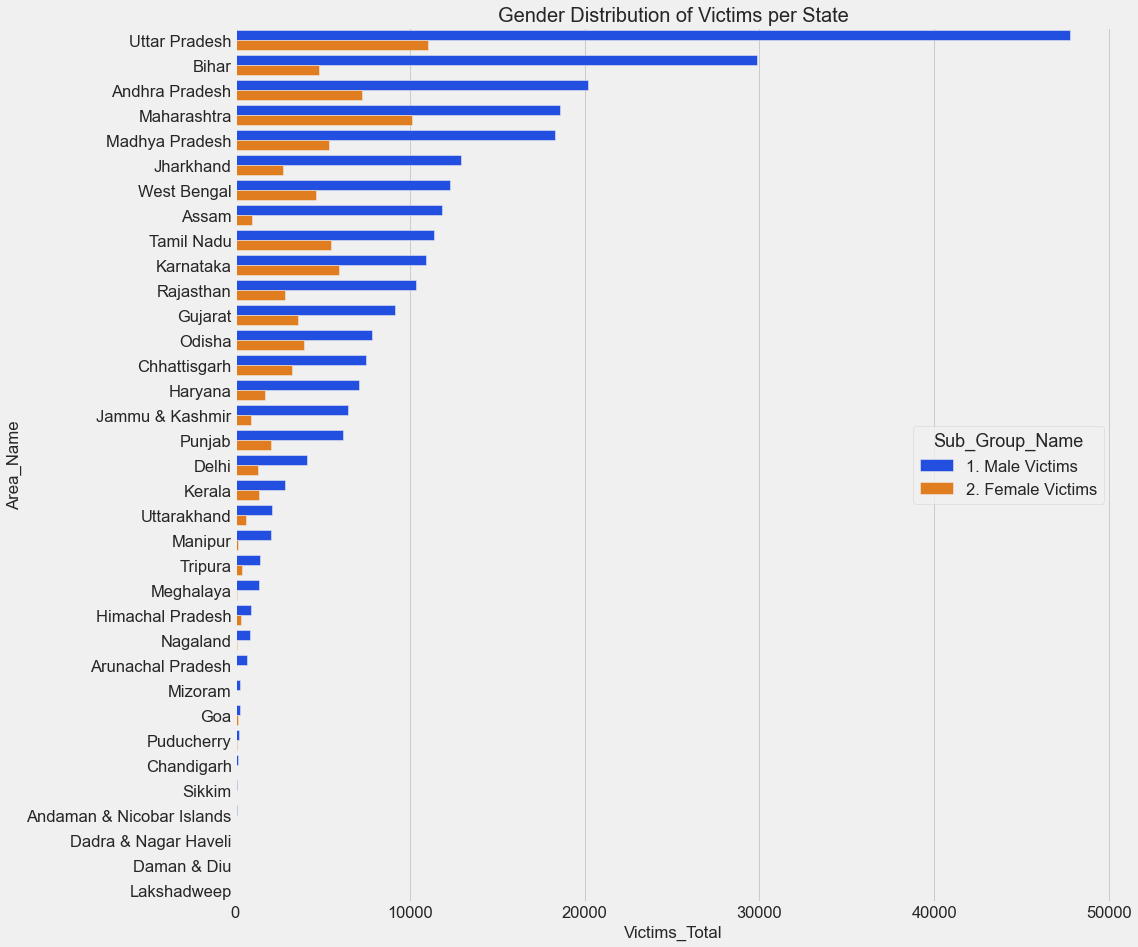

In [30]:
murdergs = murder.groupby(['Area_Name' , 'Sub_Group_Name'])['Victims_Total'].sum().sort_values(ascending = False).reset_index() #groupby state and gender
murdergs = murdergs[murdergs['Sub_Group_Name']!= '3. Total'] #we dont need total category of gender
plt.figure(figsize = (14,15))
plt.style.use("fivethirtyeight")
sns.barplot( x = 'Victims_Total', y = 'Area_Name' , hue = 'Sub_Group_Name' , data = murdergs,palette= 'bright') #barplot
plt.title('Gender Distribution of Victims per State',size = 20)

**Inference** : Similar to above results males are more likely to be get murdered as compared to females. Interesting thing to notice in this graph is Mahrashtra has second highest female victims.

Statewise Distribution of victims according to their age

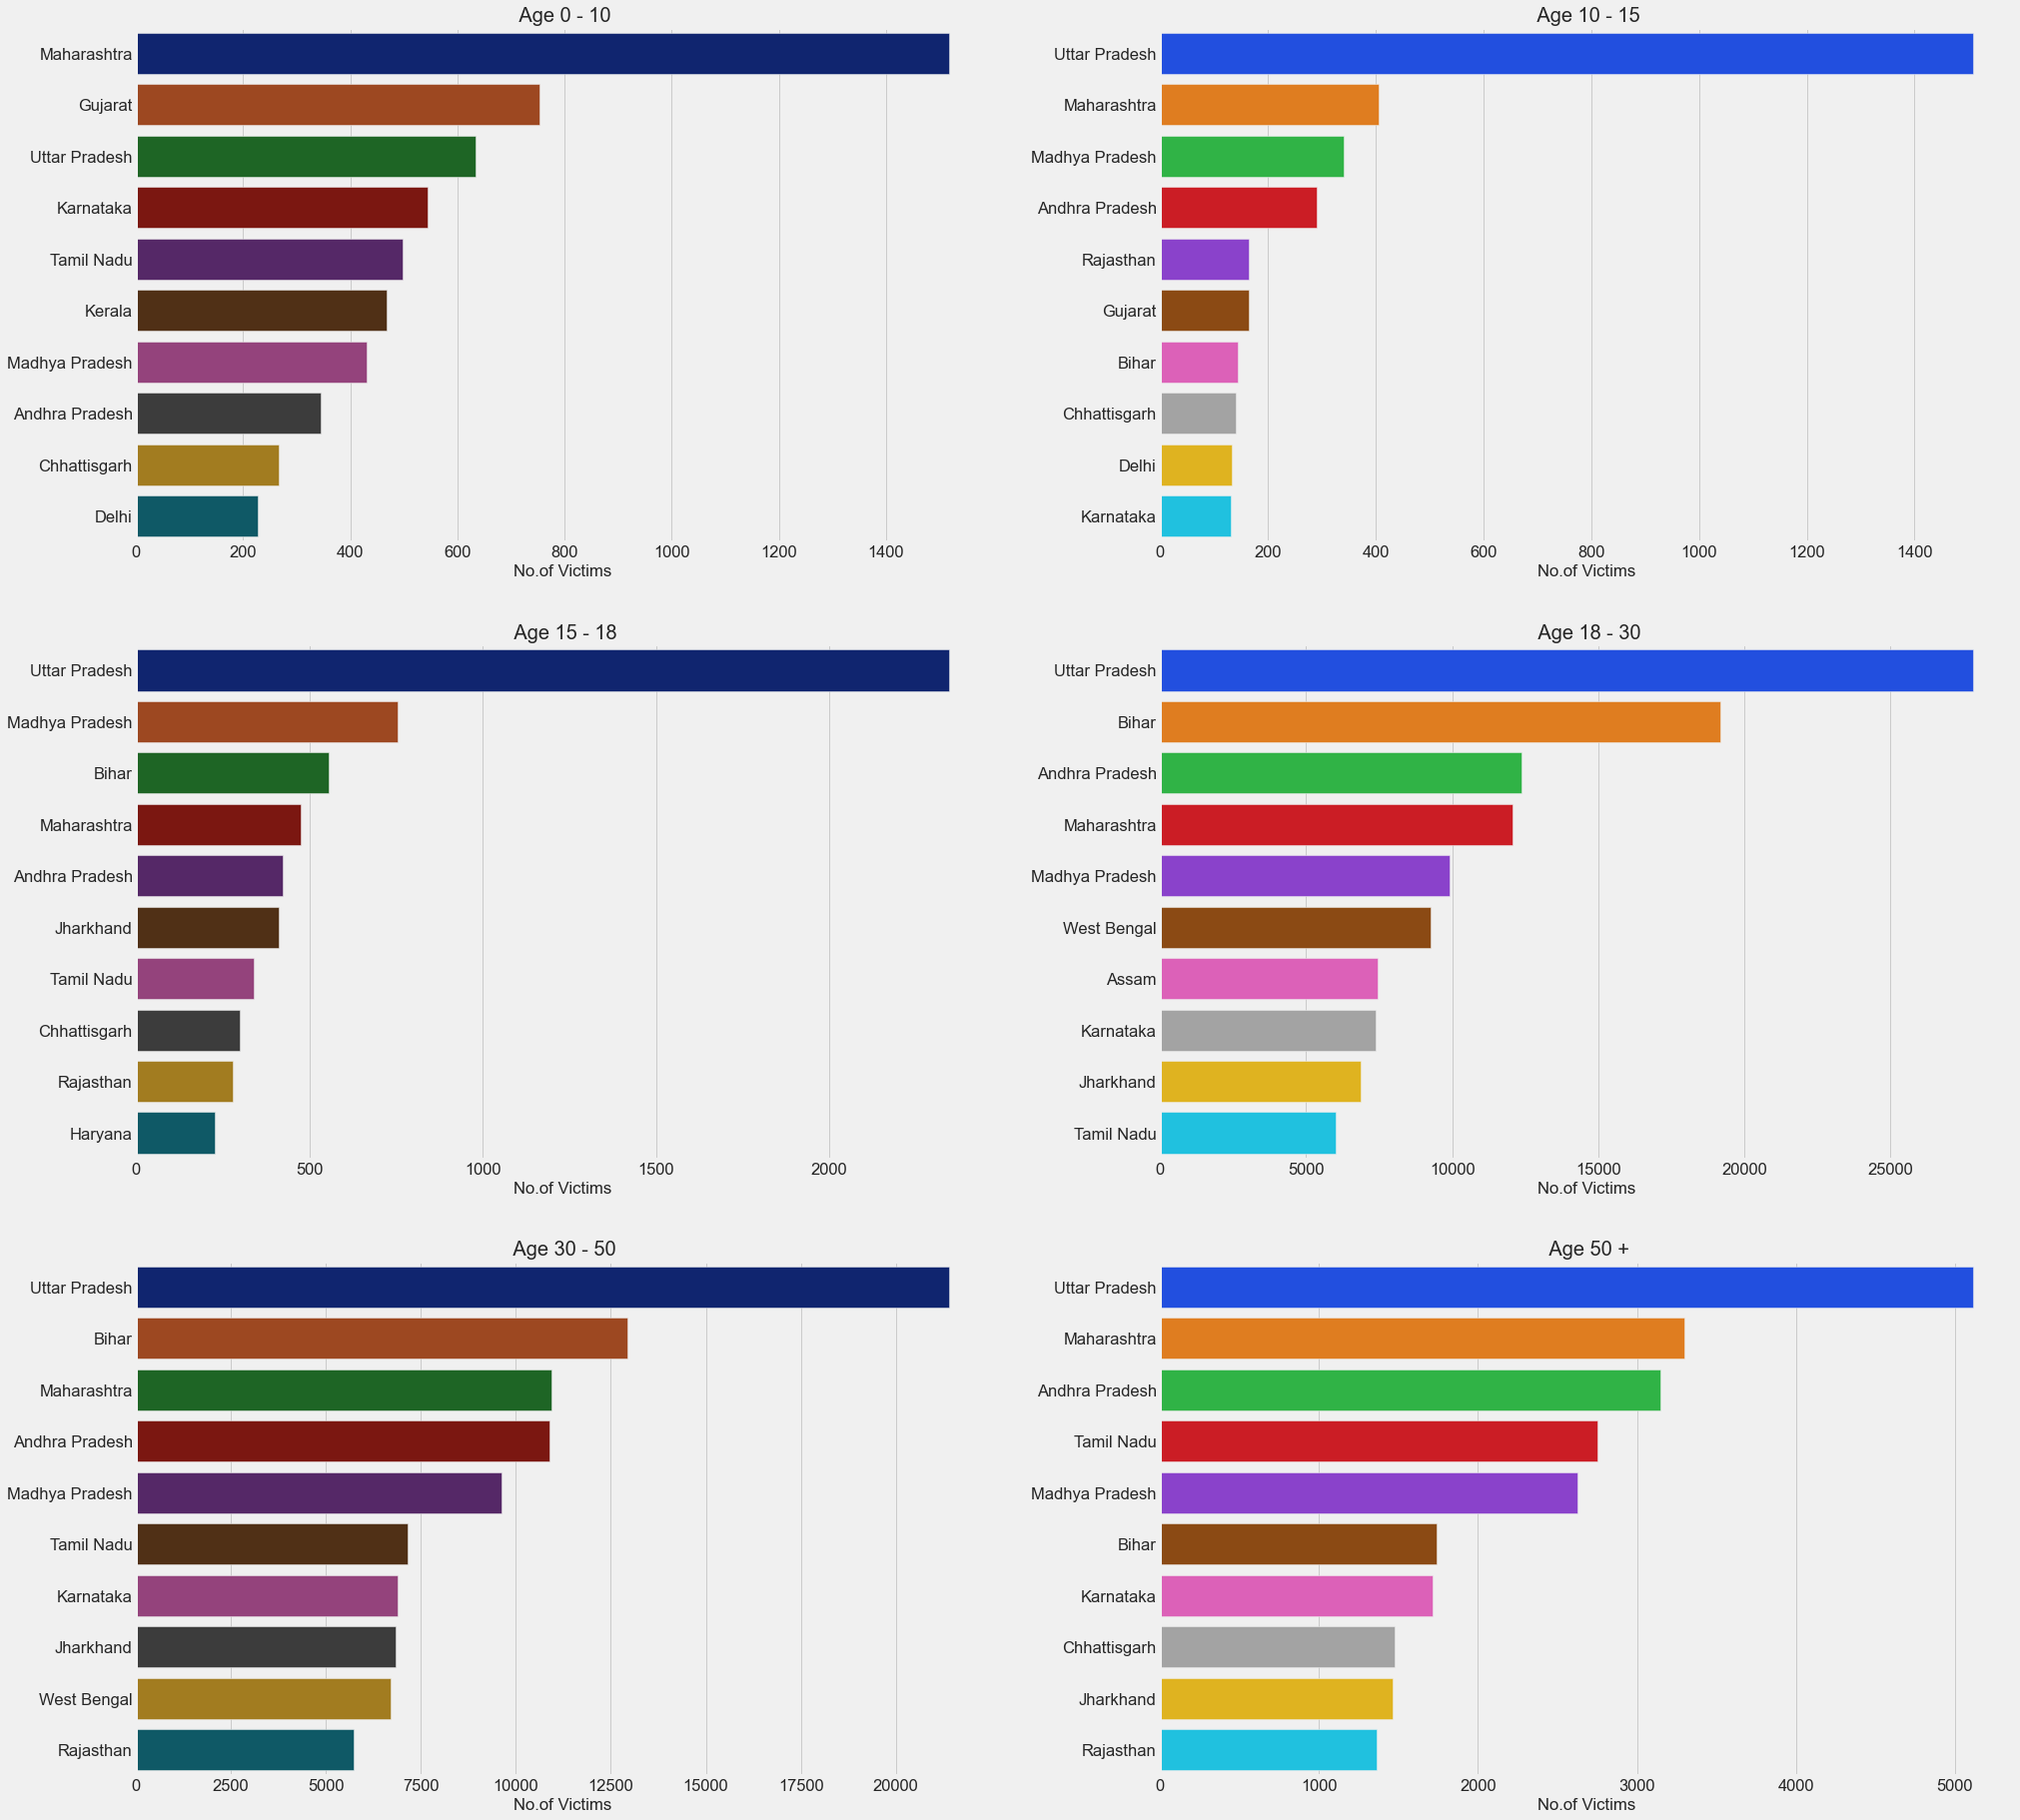

<Figure size 1008x1080 with 0 Axes>

In [31]:
murdernt = murder[murder['Sub_Group_Name']== '3. Total']
murdersa = murdernt.groupby(['Area_Name'])['Victims_Upto_10_15_Yrs','Victims_Above_50_Yrs', 
                                           'Victims_Upto_10_Yrs', 'Victims_Upto_15_18_Yrs',
                                           'Victims_Upto_18_30_Yrs','Victims_Upto_30_50_Yrs',].sum().reset_index() #grouping with state and age group
murdersa = murdersa.melt('Area_Name', var_name='AgeGroup',  value_name='vals') #melting the dataset

sns.set_style("darkgrid")
sns.set_context("talk")
plt.style.use("fivethirtyeight")


f, axes = plt.subplots(3,2, figsize = (30,30))
plt.figure(figsize = (14,15))
sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_10_Yrs'].sort_values(by=['vals'],ascending = False).head(10),ax = axes[0,0],palette= 'dark')
axes[0,0].set_title(' Age 0 - 10', size = 20)
axes[0,0].set_ylabel('')
axes[0,0].set_xlabel('No.of Victims')

sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_10_15_Yrs'].sort_values(by=['vals'],ascending = False).head(10), ax = axes[0,1],palette= 'bright' )
axes[0,1].set_title(' Age 10 - 15', size = 20)
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('No.of Victims')    


sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_15_18_Yrs'].sort_values(by=['vals'],ascending = False).head(10),ax = axes[1,0],palette= 'dark')
axes[1,0].set_title(' Age 15 - 18', size = 20)
axes[1,0].set_ylabel('')
axes[1,0].set_xlabel('No.of Victims')  

sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_18_30_Yrs'].sort_values(by=['vals'],ascending = False).head(10), ax = axes[1,1],palette= 'bright' )
axes[1,1].set_title(' Age 18 - 30', size = 20)
axes[1,1].set_ylabel('')
axes[1,1].set_xlabel('No.of Victims')  

sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_30_50_Yrs'].sort_values(by=['vals'],ascending = False).head(10), ax = axes[2,0],palette= 'dark')
axes[2,0].set_title(' Age 30 - 50', size = 20)
axes[2,0].set_ylabel('')
axes[2,0].set_xlabel('No.of Victims')  

sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Above_50_Yrs'].sort_values(by=['vals'],ascending = False).head(10),ax = axes[2,1],palette= 'bright')
axes[2,1].set_title(' Age 50 +', size = 20)
axes[2,1].set_ylabel('')
axes[2,1].set_xlabel('No.of Victims')  
plt.tight_layout()
#plt.subplots_adjust(hspace= .0001)

**Inference** : Uttarpradesh has the highest number of murder victims in all age group except age group 0 - 10 , Surprisingly Maharashtra has the highest child victims  and Gujrat ranks second in case of child victims. Assam is the only north eastern state which comes under these graphs. 

# **Conclusion**

Although country level murder rate is decreasing slowly over the years. State like Uttarpradesh , Bihar , Mahrashtra , West Bengal has the high number of victims over the years. The male age group of 18-30 is most unsafe. So if you belong to this age group Be Safe.

Running Bar Chart

In [32]:

#murderbr = murdert.groupby(['Year', 'Area_Name'])['Victims_Total'].sum().reset_index()
#murderbr = murderbr.pivot(index='Area_Name', columns='Year', values='Victims_Total').reset_index()
#murderbr.dropna()
#murderbr.to_csv('out.csv', index=False)
